## Taller 1 Introducción a Data Science

Integrantes: 


Francisco Concha.


Ronaldo Morales.

In [26]:
from bs4 import BeautifulSoup as bs
import numpy as np
import json
import pandas as pd
from urllib.parse import urljoin
import requests
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge # El modelo de regresión lineal.
from sklearn.preprocessing import StandardScaler # Utilidad para estandarizar los datos.
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from scipy.stats import f_oneway
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



In [27]:
## Se pude el codigo html
## Vector que guarda las urls
Urls = []

# string_Datos=
i=1
print("Comenzo a leer las urls")
while True:
    url = requests.get('https://distiller.com/search?page='+str(i)+'&term=bourbon')
    if (url.status_code == 200):
        
        obj_soup = bs(url.text,'html.parser')
        
        Direcciones= obj_soup.find_all('a',href = True)
        
       
        for direccion in Direcciones:

            extension_direccion = direccion['href']
            
            if extension_direccion.startswith('/spirits'):

                clase_direccion = urljoin('https://distiller.com',extension_direccion)
                
                
                Urls.append(clase_direccion)
        i += 1
    else:
        continue
    if(i == 50):
        break
    



Comenzo a leer las urls


Termino de leer las urls


## WEB SCRAPING
Todos datos fueron guardados en variables tipo string para no tener problemas a la hora de guardar las variables en una matriz normal,
Todos datos fueron obtenido sin hacer modificación alguna, excepto los datos del año, algunos de estos datos estaban en intervalos, por lo cual, se tomo el valor mayor, considerando que su intervalo no era tan grande y la diferencia del promedio era y el valor mayor era pequeña.

In [28]:
texto_dentro = "Name, Type, Cask, Location, Age, ABV %, Price, Badge, # Ratings, Customer' Rating, Flavor Summary, Expert, Expert Score, Smoky, Peaty, Spicy, Herbal, Oily, Full-bodied, Rich, Sweet, Briny, Salty, Vanilla, Tart, Fruity, Floral, Review"

datos_1 = [[]]
datos_1[0].append("Name")
datos_1[0].append("Type")
datos_1[0].append("Cask")
datos_1[0].append("Location")
datos_1[0].append("Age")
datos_1[0].append("ABV %")
datos_1[0].append("Price")
datos_1[0].append("Badge")
datos_1[0].append("# Rating")
datos_1[0].append("Customer' Rating")
datos_1[0].append("Flavor Summary")
datos_1[0].append("Expert")
datos_1[0].append("Expert Score")
datos_1[0].append("Smoky")
datos_1[0].append("Peaty")
datos_1[0].append("Spicy")
datos_1[0].append("Herbal")
datos_1[0].append("Oily")
datos_1[0].append("Full-Bodied")
datos_1[0].append("Rich")
datos_1[0].append("Sweet")
datos_1[0].append("Briny")
datos_1[0].append("Salty")
datos_1[0].append("Vanilla")
datos_1[0].append("Tart")
datos_1[0].append("Fruity")
datos_1[0].append("Floral")
datos_1[0].append("Review")
datos_1.append([])
f=1


for url in range(len(Urls)):
    link = requests.get(Urls[url])
    if (link.status_code == 200):
        nombre = ""
        tipo = ""
        cask = ""
        Nombre_Ubicacion = ""
        Age = ""
        abv = ""
        costo = ""
        badge = ""
        cant_Review = ""
        Clasi_Clien = ""
        perfil_sabor = ""
        nombre_Experto = ""
        score = ""
        smoky = ""
        Peaty = ""
        spicy = ""
        Herbal = ""
        Oily = ""
        Full_bodied = ""
        Rich = ""
        Sweet = ""
        Briny = ""
        Salty = ""
        Vanilla = ""
        Tart = ""
        Fruity = ""
        Floral = ""
        review = ""
        #texto html de la pagina
        Texto_html = bs(link.text,'html.parser')
        #encuentra el elemto canvas que que comienza con esto ↓ 
        elemento_Canvas = Texto_html.find('canvas', class_='js-flavor-profile-chart')
        #obtienes la lista de elementos que con esta ↓ variable, que esta en formato json
        if elemento_Canvas:
            Datos_Sabores = elemento_Canvas.get('data-flavors')
            
            #Obtienes una lista de las variables antes mencionadas.
            Dictado_Sabores = json.loads(Datos_Sabores)
            if Dictado_Sabores.get('smoky') is not None:
                smoky = str(Dictado_Sabores.get('smoky'))
            else:
                smoky = " "
            if Dictado_Sabores.get('peaty') is not None:

                Peaty = str(Dictado_Sabores.get('peaty'))
                
            else:
                Peaty = " "
            if Dictado_Sabores.get('spicy') is not None:

                spicy = str(Dictado_Sabores.get('spicy'))
            else:
                spicy = " "
            if Dictado_Sabores.get('herbal') is not None:

                Herbal = str(Dictado_Sabores.get('herbal'))
            else:
                Herbal = " "
            if Dictado_Sabores.get('oily') is not None:

                Oily = str(Dictado_Sabores.get('oily'))
            else:
                Oily = " "
            if Dictado_Sabores.get('full_bodied') is not None:

                Full_bodied = str(Dictado_Sabores.get('full_bodied'))
            else:
                Full_bodied = " "
            if Dictado_Sabores.get('rich') is not None:

                Rich = str(Dictado_Sabores.get('rich'))
            else:
                Rich = " "
            if Dictado_Sabores.get('sweet') is not None:

                Sweet = str(Dictado_Sabores.get('sweet'))
            else:
                Sweet = " "
            if Dictado_Sabores.get('briny') is not None:

                Briny = str(Dictado_Sabores.get('briny'))
            else:
                Briny = " "
            if Dictado_Sabores.get('salty') is not None:

                Salty = str(Dictado_Sabores.get('salty'))
            else:
                Salty = " "
            if Dictado_Sabores.get('vanilla') is not None:

                Vanilla = str(Dictado_Sabores.get('vanilla'))
            else:
                Vanilla = " "
            if Dictado_Sabores.get('tart') is not None:

                Tart = str(Dictado_Sabores.get('tart'))
            else:
                Tart = " "
            if Dictado_Sabores.get('fruity') is not None:
                Fruity = str(Dictado_Sabores.get('fruity'))
            else:
                Fruity = " "
            if Dictado_Sabores.get('floral') is not None:

                Floral = str(Dictado_Sabores.get('floral'))
            else:
                Floral = " "
        nombre_bool = Texto_html.find('h1', class_='secondary-headline name')
        if nombre_bool is not None:
            nombre = str(nombre_bool.text.strip())
        else:
            nombre_bool = Texto_html.find('h1', class_='secondary-headline name long')
            if nombre_bool is not None:
                nombre_lista= nombre_bool.text.strip()
            
                if isinstance(nombre_lista,list):
                    #creo un vector, lo separo, y lo hago un string grande uwu
                    nombre_vector = ''.join(nombre_lista)
                    partes_nombre = nombre_vector.split()
                    nombre =str(''.join(partes_nombre))
                    
        #clasificación cliente
        Ecc= Texto_html.find('div',  class_='rating-display__value average-rating')
        
        if Ecc is not None:

            Clasi_Clien = str(Ecc.find('span', itemprop='ratingValue').text.strip())
        else:
            Clasi_Clien = " "
        #precio
        for i in range(1,6):
            if Texto_html.find('div', class_='spirit-cost cost-'+str(i)):
                costo = str(i)
        #Se busca con la etiqueta li y el primero que tenga ↓ esto
        encontrar_Age = Texto_html.find('li',class_='detail age') 
        age_modificar = encontrar_Age.find('div', class_='value').text.strip()
        
        if age_modificar.lower() == 'nas':
        
            Age = str(age_modificar)
        elif age_modificar is None:
            Age = " "
        else:
            Age_sin_texto = age_modificar.replace('Year','').strip()
            if '-' in Age_sin_texto:
                partes = Age_sin_texto.split('-')
                if len(partes) >=2:
                    
                    age_1=partes[1].replace('years','').strip()
                    Age = str(age_1)
                
            elif Age_sin_texto.isdigit():
                Age = str(Age_sin_texto)
            else:
                Age = " "
        
        #rewie
        encontrar_review = Texto_html.find('span', itemprop='ratingCount')
        if encontrar_review:
            cant_Review = str(encontrar_review.text.strip())
        else:
            cant_Review = " "
        #tipo
        tipo_bool = Texto_html.find('p', class_ = 'ultra-mini-headline type')
        if tipo_bool is not None:
            tipo=tipo_bool.text.strip()
        else:
            tipo = " "
        #ubicación
        Nombre_Ubicacion_bool = Texto_html.find('p', class_ = 'ultra-mini-headline location middleweight')
        if Nombre_Ubicacion_bool is not None:
            Nombre_Ubicacion = str(Nombre_Ubicacion_bool.text.strip())
        else:
            Nombre_Ubicacion = ""
        #Barril
        cask_val_1 = Texto_html.find('li', class_='detail cask-type')

        if cask_val_1 is not None:
            cask_val_2 = cask_val_1.find('div',class_='value')
            if cask_val_2 is not None:
                cask = str(cask_val_2.text.strip().replace(',', ' '))
            else:
                cask =" "
        else:
            cask = " "
        
        #Nombre
        nombre_html = Texto_html.find('div', class_='meet-experts')

        Exper_val = Texto_html.find('div', class_='meet-experts')
        if Exper_val is not None:
            Exper_val_1 = Exper_val.find('a', itemprop='author')
            if Exper_val_1 is not None:
                nombre_Experto = str(Exper_val_1.text.strip())
            else:
                nombre_Experto = " "
        else:
            nombre_Experto =" "   
        score_val = Texto_html.find('div', class_='distiller-score')
        if score_val is not None:
            score = str(score_val.span.text.strip())
        else:
            score = " "

        abv_val = Texto_html.find('li', class_='detail abv')
        if abv_val is not None:
            abv_val_1 =abv_val.find('div', class_='value')
            if abv_val_1 is not None:
                abv = str(abv_val_1.text.strip())
            else:
                abv = " "
        else:
            abv = " "

        perfil_sabor_val =Texto_html.find('div',class_='flavor-profile')
        if perfil_sabor_val is not None:
            perfil_sabor_val_1 =perfil_sabor_val.find('h3',class_='secondary-headline flavors middleweight')
            if perfil_sabor_val_1 is not None:
                perfil_sabor= str(perfil_sabor_val_1.text.strip())
            else:
                perfil_sabor = " "
        else:
            perfil_sabor =" "
        review_val = Texto_html.find('blockquote', itemprop='reviewBody')
        if review_val is not None:
            review = str(review_val.text.strip()).replace('"',"").replace(",","")
        else:
            review = " "
        badge_val = Texto_html.find('div', class_='spirit-badge')
        if badge_val is not None:
            badge = str(badge_val.text.strip())
        else:
            badge =" "
        
        
        #texto_dentro = str(nombre) + "," + str(tipo) + "," + str(cask) + "," + str(Nombre_Ubicacion) + "," + str(Age) + "," + str(abv) + "," + str(costo) + "," + str(badge) + "," + str(cant_Review) + "," + str(Clasi_Clien) + "," + str(perfil_sabor) + "," + str(nombre_Experto) + "," + str(score) + "," + str(smoky) + "," + str(Peaty) + "," + str(spicy) + "," + str(Herbal) + "," + str(Oily) + "," + str(Full_bodied) + "," + str(Rich) + "," + str(Sweet) + "," + str(Briny) + "," + str(Salty) + "," + str(Vanilla) + "," + str(Tart) + "," + str(Fruity) + "," + str(Floral) + "," + str(review)  +"\n" 
        datos_1.append([])
        datos_1[f].append(str(nombre))
        datos_1[f].append(str(tipo))
        datos_1[f].append(str(cask))
        datos_1[f].append(str(Nombre_Ubicacion))
        datos_1[f].append(str(Age)) 
        datos_1[f].append(str(abv))
        datos_1[f].append(str(costo))
        datos_1[f].append(str(badge))
        datos_1[f].append(str(cant_Review))
        datos_1[f].append(str(Clasi_Clien))
        datos_1[f].append(str(perfil_sabor))
        datos_1[f].append(str(nombre_Experto))
        datos_1[f].append(str(score))
        datos_1[f].append(str(smoky))
        datos_1[f].append(str(Peaty))
        datos_1[f].append(str(spicy))
        datos_1[f].append(str(Herbal))
        datos_1[f].append(str(Oily))
        datos_1[f].append(str(Full_bodied))
        datos_1[f].append(str(Rich))
        datos_1[f].append(str(Sweet))
        datos_1[f].append(str(Briny))
        datos_1[f].append(str(Salty))
        datos_1[f].append(str(Vanilla))
        datos_1[f].append(str(Tart))
        datos_1[f].append(str(Fruity))
        datos_1[f].append(str(Floral))
        datos_1[f].append(str(review))
        f +=1
            
        
        


Fin


## Preparación de datos.
observando los datos, de puede deducir que existen muchas variables que pueden afectar el numero de rating de las botellas, en este caso, se inicio, limpiando los datos, eliminando datos en NaN y "", lo que hace esto es disminuir cociderablemente la tabla y al hacer una inspeccion visual de los datos no se logra divisar algun predicor bueno.

Se limitaron los datos del '# Rating' a 1500 dado que comos de estos datos llegaban a este valor, haciendo que el modelo predictivo a ocupar tengra un menor rendimiento.

In [100]:
df = pd.DataFrame(datos_1[1:],columns=datos_1[0])

df['Price'] = df["Price"].replace('None', np.nan)

#print(df['Age'].unique)
df['Age'] = df['Age'].replace('None', np.nan)
df['Age'] = df['Age'].replace('NAS', np.nan).replace('nas',np.nan)
df['Age'] = df['Age'].replace(' ', np.nan)
df['Age'] = df['Age'].replace('NaN', np.nan)

df['Smoky'] =df['Smoky'].replace('', np.nan)
df['Peaty'] =df['Peaty'].replace('', np.nan)
df['Spicy'] =df['Spicy'].replace('', np.nan)
df['Herbal'] =df['Herbal'].replace('', np.nan)
df['Oily'] =df['Oily'].replace('', np.nan)
df['Full-Bodied'] =df['Full-Bodied'].replace('', np.nan)
df['Sweet'] =df['Sweet'].replace('', np.nan)
df['Briny'] =df['Briny'].replace('', np.nan)
df['Salty'] =df['Salty'].replace('', np.nan)
df['Vanilla'] =df['Vanilla'].replace('', np.nan)
df['Tart'] =df['Tart'].replace('', np.nan)
df['Fruity'] =df['Fruity'].replace('', np.nan)
df['Floral'] =df['Floral'].replace('', np.nan)
df['Rich'] = df['Rich'].replace('', np.nan)
df['# Rating'] = df['# Rating'].replace(' ', np.nan)


df['# Rating'] = pd.to_numeric(df['# Rating'], errors='coerce', downcast='integer')
df['Price'] = pd.to_numeric(df['Price'])


df.dropna(subset=['Price', '# Rating', "Customer' Rating", 'ABV %'], inplace=True)
df.dropna(subset=['Age', 'Rich','Smoky','Peaty','Spicy','Herbal','Oily','Full-Bodied','Sweet','Briny', 'Vanilla','Tart','Fruity','Floral'], inplace=True)
df['# Rating']= df['# Rating'].astype('float')
df['Price'] = df['Price'].astype('float')
df['Age'] = df['Age'].astype('float')
df['Rich'] = df['Rich'].astype('float')
df["Customer' Rating"] = df["Customer' Rating"].astype('float')
df['Smoky'] = df['Smoky'].astype('float')
df['Peaty'] = df['Peaty'].astype('float')
df['Spicy'] = df['Spicy'].astype('float')
df['Herbal'] = df['Herbal'].astype('float')
df['Oily'] = df['Oily'].astype('float')
df['Full-Bodied'] = df['Full-Bodied'].astype('float')
df['Briny'] = df['Briny'].astype('float')
df['Vanilla'] = df['Vanilla'].astype('float')
df['Tart'] = df['Tart'].astype('float')
df['Fruity'] = df['Fruity'].astype('float')
df['Floral'] = df['Floral'].astype('float')
df['ABV %'] = df['ABV %'].astype('float')
df['Sweet'] = df['Sweet'].astype('float')
df['# Rating'] = df['# Rating'].apply(lambda x: min(x, 1500))
df['Floral'] = df['Floral'].apply(lambda x: min(x, 1500))
df['Smoky'] = df['Smoky'].apply(lambda x: min(x, 1500))





### Procesamiento de datos.

Utilizando la técnica de correalción para obtener las mejores variables predictorias con una correlación absoluta mayor a 0.2, se obtiene las siguientes resultado.

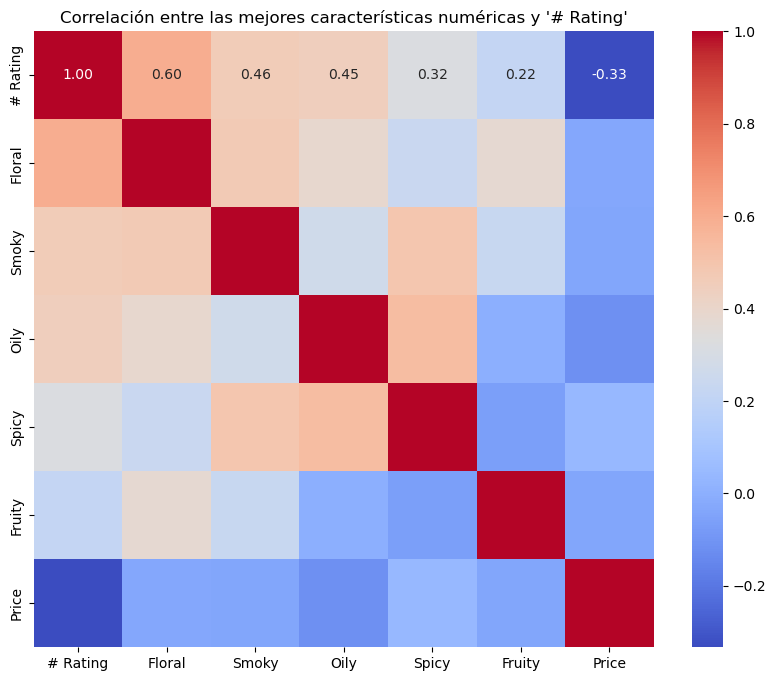

Mejores características numéricas para predecir '# Rating': ['# Rating', 'Floral', 'Smoky', 'Oily', 'Spicy', 'Fruity', 'Price']


In [101]:
numeric_columns= df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['# Rating'].sort_values(ascending=False)
top_features = correlation_with_target[abs(correlation_with_target) > 0.2].index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre las mejores características numéricas y '# Rating'")
plt.show()
print("Mejores características numéricas para predecir '# Rating':", top_features)

## Preparación de datos.
Despues de la visualización se puede obtener datos que pueden ser buenas variables predictorias, revisando el grafico, se llega a la conclusión de que las mejores varibles predictoras son las siguientes: 'Floral','Floral' dado que estas tienen una mejor correlasión con # Rating.


Con el .OLS y ocupando el apartado de P>|t|, se puede observar el que valor más pequeño es el del precio, por lo cual este sera el valor a concidera para el proceso de regresión lineal, en lo teorico no hace referencia a lo practico con los modelos de regresión lineal, Ridge y lisso.


In [102]:

x = sm.add_constant(df[['Floral','Smoky']])
modelo_ols_1 = sm.OLS(df['# Rating'],x ).fit()
modelo_ols_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               # Rating   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     19.73
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           2.60e-07
Time:                        20:56:13   Log-Likelihood:                -473.03
No. Observations:                  63   AIC:                             952.1
Df Residuals:                      60   BIC:                             958.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4206     99.792      0.706      0.483    -129.194     270.035
Floral        15.9219      3.728      4.271      0.000       8.465      23.379
Smoky          8.5542      4.189      2.042      0.046       0.174      16.934
==============================================================================
Omnibus:                        7.013   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.190
Skew:                           0.513   Prob(JB):                       0.0275
Kurtosis:                       4.298   Cond. No.                         55.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Entranmiento de los datos.
En este apartado, se ocuparan los datos encontrados anteriormente para realizar un entrenamientos con estos en una proporción de 80% de prueba.

In [103]:

val_x = df[['Floral','Smoky']]
val_y = df['# Rating']

Se entrenan las variables.

In [104]:
x_Train, x_Test, y_Train, y_Test = train_test_split(val_x,val_y,test_size=0.8)


## Regresión lineal
En este aparto se evaluara el modelo de regresión lineal y se obtendran resultados inciales para evaluar el rendimiento de  este.


In [105]:
modelo = LinearRegression()
modelo.fit(x_Train, y_Train)

y_predic_test = modelo.predict(x_Test)

Al revisar los resultadosd el error cuadratico medio es relativamente bueno dado que tiene una mejora notable a diferenia de mse base, pero el error cuadrativo no es bueno, dado tambien el 


In [106]:
mean_target = np.mean(y_Train)

# Crear un array con la misma longitud que el conjunto de prueba, lleno con la media
predictions_base = np.full_like(y_Test, fill_value=mean_target)

# Calcular el MSE del modelo base
mse_base = np.mean((predictions_base - y_Test) ** 2)

print("MSE del modelo base (media):", mse_base)

MSE del modelo base (media): 407838.3174019608


In [107]:
mse = mean_squared_error(y_Test, y_predic_test)

r2 = r2_score(y_Test, y_predic_test)

print(f'El valor del mse es:{mse} y el valor del r^2 es de: {r2}')

El valor del mse es:256707.4056579689 y el valor del r^2 es de: 0.2709883843166069


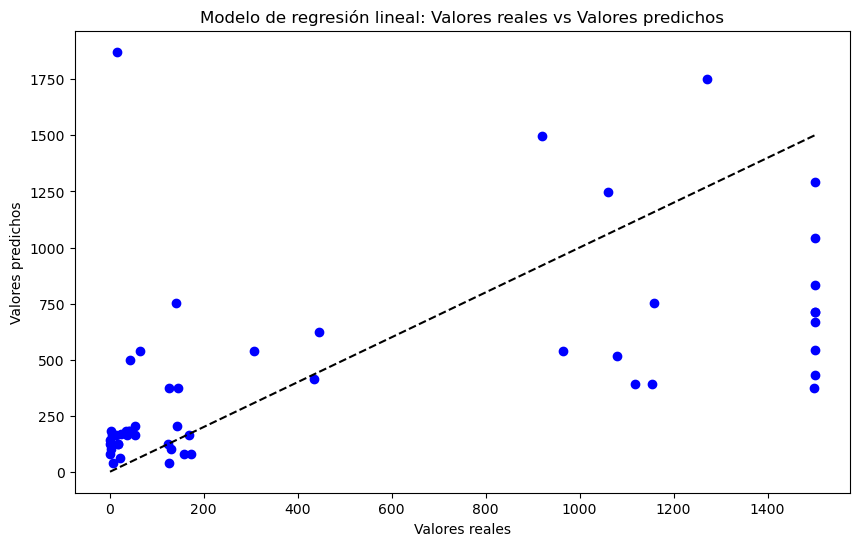

In [108]:
# Graficar el modelo de regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_Test, y_predic_test, color='blue')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Modelo de regresión lineal: Valores reales vs Valores predichos')
plt.plot([min(y_Test), max(y_Test)], [min(y_Test), max(y_Test)], color='black', linestyle='--') # Línea de referencia
plt.show()




El resultado de la regresión lineal no es realmente bueno siendo esto por que no se adapta a sus variables siendo poco flexible para estas.
El mse de la regresión lineal es un poco más bajo que el del las estadisticas medias siendo un poco mejor, pero el r2 nos indica que este modelo no se adapta a los datos pedidos.

## Regresión LASSO Y Ridge
En este apartado normalizaremos y entrenaremos las variables con los modelos predictivos Lasso y Ridge.


In [109]:
normalizer = StandardScaler().fit(val_x, val_y)

x_train_morm = normalizer.fit_transform(x_Train)
x_test_norm = normalizer.transform(x_Test)

In [110]:
Modelo_Lasso = Lasso().fit(x_train_morm, y_Train)
y_pred_lasso = Modelo_Lasso.predict(x_test_norm)
mse_lasso = mean_squared_error(y_Test, y_predic_test)
r2_lasso = r2_score(y_Test, y_pred_lasso)
print(f"MSE: {mse_lasso} | R2: {r2_lasso}")

MSE: 256707.4056579689 | R2: 0.27396610843232205


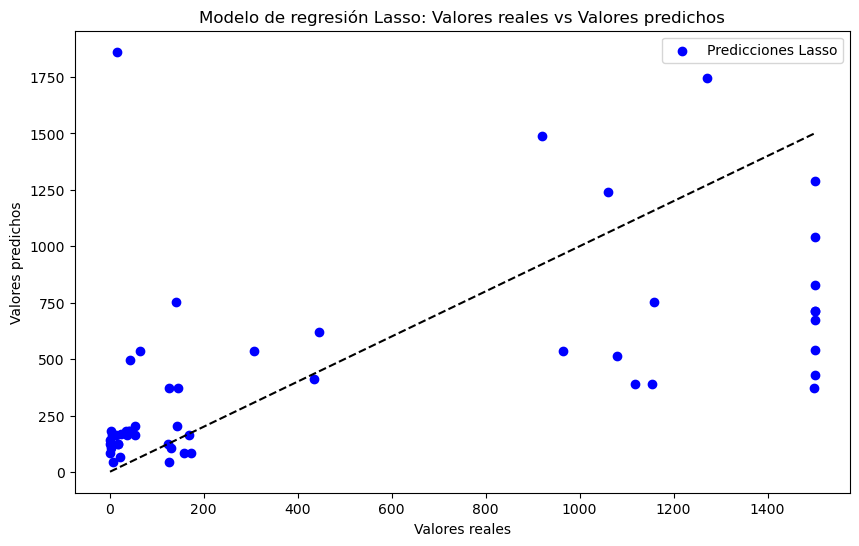

In [111]:

plt.figure(figsize=(10, 6))
plt.scatter(y_Test, y_pred_lasso, color='blue', label='Predicciones Lasso')
plt.plot([min(y_Test), max(y_Test)], [min(y_Test), max(y_Test)], color='black', linestyle='--') # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Modelo de regresión Lasso: Valores reales vs Valores predichos')
plt.legend()
plt.show()


In [112]:
# Con la regresión Ridge, vemos esta vez un pequeño decremento del rendimiento, pero sigue sin ser mejor.
modelo_Ridge = Ridge().fit(x_train_morm, y_Train)
y_pred_ridge = modelo_Ridge.predict(x_test_norm)
mse_ridge = mean_squared_error(y_Test, y_pred_ridge)
r2_ridge = r2_score(y_Test, y_pred_ridge)
print(f"MSE: {mse_ridge} | R2: {r2_ridge}")

MSE: 249808.52953113936 | R2: 0.2905801869711848


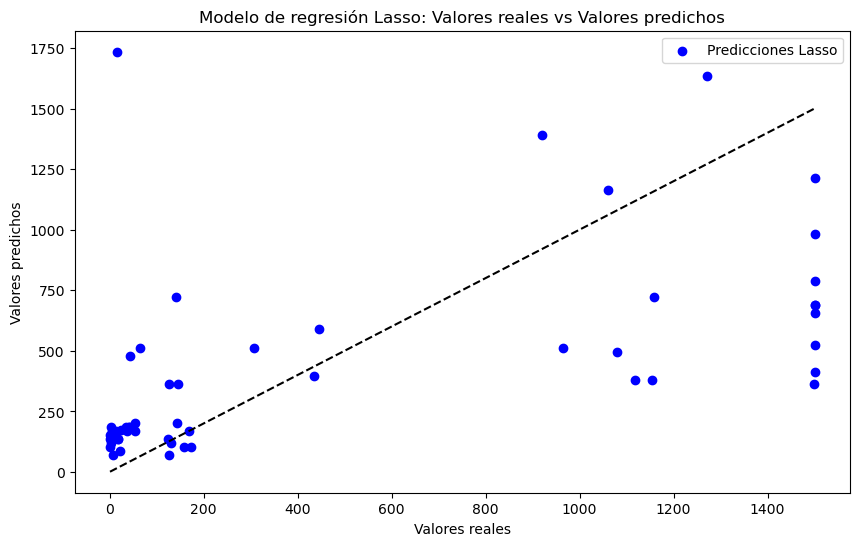

In [113]:
import matplotlib.pyplot as plt

# Graficar los resultados del modelo de regresión Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_Test, y_pred_ridge, color='blue', label='Predicciones Lasso')
plt.plot([min(y_Test), max(y_Test)], [min(y_Test), max(y_Test)], color='black', linestyle='--') # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Modelo de regresión Lasso: Valores reales vs Valores predichos')
plt.legend()
plt.show()

## Resultad Ridge y LASSO
El modelo lasso mejora los parametros indicadores del modelo, es decir, mejora el mse y r2. Esta mejora no es tan grande siendo esto por los datos anomalos y los d

In [114]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
modelo_lasso_cros = Lasso()
modelo_Ridge_cros = Ridge()
grid_search_lasso = GridSearchCV(modelo_lasso_cros, param_grid_lasso,cv=5 ,scoring='r2')
grid_search_ridge = GridSearchCV(modelo_Ridge_cros, param_grid_ridge,cv=5 ,scoring='r2')


In [115]:

grid_search_lasso.fit(x_train_morm, y_Train)
best_params_lasso = grid_search_lasso.best_params_



y_pred_lasso_cros = grid_search_lasso.predict(x_test_norm)

mse_lasso_cros = mean_squared_error(y_Test,y_pred_lasso_cros)

r2_lasso_cros = r2_score(y_Test,y_pred_lasso_cros)

print(f"MSE: {mse_lasso_cros} Y R2: {r2_lasso_cros}")

MSE: 247044.05228211128 Y R2: 0.2984308994220719


In [116]:
grid_search_ridge.fit(x_train_morm, y_Train)
best_params_ridge = grid_search_ridge.best_params_

y_pred_ridge_cross = grid_search_ridge.predict(x_test_norm)
mse_ridge_cros = mean_squared_error(y_Test,y_pred_ridge_cross)
r2_ridge_cros = r2_score(y_Test,y_pred_ridge_cross)
print(f"MSE: {mse_ridge_cros} Y R2: {r2_ridge_cros}")

MSE: 262352.5211034869 Y R2: 0.25495707925507893


In [117]:
print(f"El la diferencia del mse del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de {float(mse - mse_lasso_cros)}\n  ")
print(f"El la diferencia del mse del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de {float(mse - mse_ridge_cros)}\n   ")
print(f"El la diferencia del r2 del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de {float(r2 - r2_lasso_cros)}\n   ")
print(f"El la diferencia del r2 del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de {float(r2 - r2_ridge_cros)}\n  ")


El la diferencia del mse del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de 9663.353375857609
  
El la diferencia del mse del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de -5645.115445517993
   
El la diferencia del r2 del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de -0.027442515105465026
   
El la diferencia del r2 del modelo de regresión lineal a comparación del lasso con los hipperparametros de 5-fold cross validation es de 0.016031305061527945
  


Las comparaciones del los modelos de Lasso y Ridge con los hiperparametros encontrados con 5-fold cross validation es no es tan notable.


Para Lasso:


    El modelo tiene una mejora en la predicción pero se adapta menos al modelo.


Para Ridge:


    El modelo tiene una mejora en la adpatación pero emperoa con las predicciones.



Esto idica que el mejor modelo para este caso seria el Lasso, dado que la diferencia es diminuta en la adaptación del modelo, mientras la diferencia de predicciones es muy grande.
 

## Optimización de hiperparametros.

En este aparto buscaremos la optimización de los hiperparametros encontrado en el ultimo apartado para los modelos de Lasso y Ridge

primero se iniciara con Grid Search.

In [118]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
modelo_ridge_op = Ridge()
grid_search_ridge = GridSearchCV(modelo_ridge_op, param_grid, cv=5, scoring='r2')

grid_search_ridge.fit(x_train_morm, y_Train)
best_params_ridge = grid_search_ridge.best_params_
y_pred_ridge = grid_search_ridge.best_estimator_.predict(x_test_norm)
mse_ridge = mean_squared_error(y_Test, y_pred_ridge)
r2_ridge = r2_score(y_Test, y_pred_ridge)
print("Mejores hiperparámetros para Ridge:", best_params_ridge)
print("MSE para Ridge:", mse_ridge)
print("R^2 para Ridge:", r2_ridge)

Mejores hiperparámetros para Ridge: {'alpha': 10}
MSE para Ridge: 262352.5211034869
R^2 para Ridge: 0.25495707925507893


In [119]:
modelo_lasso_op = Lasso()

grid_search_lasso = GridSearchCV(modelo_lasso_op, param_grid, cv=5, scoring='r2')

grid_search_lasso.fit(x_train_morm, y_Train)
y_pred_lasso = grid_search_lasso.best_estimator_.predict(x_test_norm)
mse_lasso = mean_squared_error(y_Test, y_pred_lasso)
r2_lasso = r2_score(y_Test, y_pred_lasso)
print("MSE para Lasso:", mse_lasso)
print("R^2 para Lasso:", r2_lasso)

MSE para Lasso: 247044.05228211128
R^2 para Lasso: 0.2984308994220719


In [120]:
param_dist = {'alpha': uniform(0.001, 10)}
modelo_ridge_ram = Ridge()


random_search_ridge = RandomizedSearchCV(modelo_ridge_ram, param_distributions=param_dist, n_iter=5, cv=5, scoring='r2')

random_search_ridge.fit(x_train_morm, y_Train)
best_params_ridge = random_search_ridge.best_params_
y_pred_ridgeran = random_search_ridge.best_estimator_.predict(x_test_norm)
mse_ridge_ram = mean_squared_error(y_Test, y_pred_ridgeran)
r2_ridge_ram = r2_score(y_Test, y_pred_ridge)
print("Mejores hiperparámetros para Ridge:", best_params_ridge)
print("MSE para Ridge:", mse_ridge)
print("R^2 para Ridge:", r2_ridge)


Mejores hiperparámetros para Ridge: {'alpha': 9.753872103430144}
MSE para Ridge: 262352.5211034869
R^2 para Ridge: 0.25495707925507893


In [121]:
param_dist = {'alpha': uniform(0.001, 10)}
modelo_lasso_ram = Lasso()

random_search_lasso = RandomizedSearchCV(modelo_lasso_ram,param_distributions=param_dist,n_iter=5,scoring='r2')

random_search_lasso.fit(x_train_morm,y_Train)
y_pred_lasso_ram = random_search_lasso.best_estimator_.predict(x_test_norm)

mse_lasso_ram = mean_squared_error(y_Test,y_pred_lasso_ram)
r2_ram_lasso = r2_score(y_Test,y_pred_lasso_ram)

print(f"mse: {mse_lasso_ram}")
print(f"R2: {r2_ram_lasso}")


mse: 248620.48260663668
R2: 0.2939540670730053


In [123]:
print(f"MSE de lasso con los hiperparametros mejorados son: {mse_lasso -mse_lasso_ram}\n")
print(f"MSE de ridge con los hiperparametros mejorados son: {mse_ridge -mse_ridge_ram}\n")

print(f"r2 de lasso con los hiperparametros mejorados son: {r2_lasso -r2_ram_lasso}\n")
print(f"r2 de ridge con los hiperparametros mejorados son: {r2_ridge -r2_ridge_ram}\n")




MSE de lasso con los hiperparametros mejorados son: -1576.4303245253977

MSE de ridge con los hiperparametros mejorados son: 781.1834307776298

Con los hiperparametros mejorados son: 0.004476832349066595

Con los hiperparametros mejorados son: 0.0



## Conclusiones.

El principal desafío de este taller fue el web scraping, debido a la gran cantidad de datos que necesitábamos obtener. Además, el proceso para obtener una buena predicción del número de rating fue relativamente complicado. Todos los modelos que evaluamos mostraron un rendimiento deficiente en este aspecto. Sin embargo, encontramos que el modelo de Ridge con los hiperparámetros obtenidos mediante Random Search fue el mejor en términos de error cuadrático medio (MSE), aunque mantuvo un coeficiente de determinación (R2) similar al Ridge sin los hiperparámetros optimizados. En resumen, con los modelos y datos disponibles, no fue posible predecir de manera precisa el número de rating de las bebidas alcohólicas. 